### Biblioteki

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt

import os
import sys

### Ekstrakcja danych

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# retrive the data from .zip

zip_file_train = "train.zip"
zip_file_test = "test_all.zip"

if not os.path.exists(zip_file_train):
    print("Error: train.zip not found.")
else:
    print(f"Found {zip_file_train}")


if not os.path.exists(zip_file_test):
    print("Error: test_all.zip not found.")
else:
    print(f"Found {zip_file_test}")

# Load the data from the zip files
if not os.path.exists("train"):
    print("Extracting train.zip...")
    with zipfile.ZipFile(zip_file_train, 'r') as zip_ref:
        zip_ref.extractall("train")
else:
    print("train already extracted.")

if not os.path.exists("test"):
    print("Extracting test_all.zip...")
    with zipfile.ZipFile(zip_file_test, 'r') as zip_ref:
        zip_ref.extractall("test")
else:
    print("test already extracted.")

Found train.zip
Found test_all.zip


Found 50 folders in train/train: ['acoustic', 'antenna', 'bacteria', 'battery', 'bean', 'beetle', 'bicycle', 'birch', 'bird', 'bomb', 'bread', 'bridge', 'camera', 'carbon', 'cat', 'corn', 'crab', 'crocodilian', 'echinoderm', 'egg', 'elephant', 'fish', 'flower', 'frog', 'fungus', 'gauge', 'hammer', 'icecream', 'kangaroo', 'memorial', 'monkey', 'motor', 'nest', 'palm', 'pizza', 'pot', 'printer', 'saw', 'snake', 'spice', 'spider', 'spoon', 'squash', 'swine', 'tea', 'tomato', 'towel', 'truck', 'turtle', 'worm']


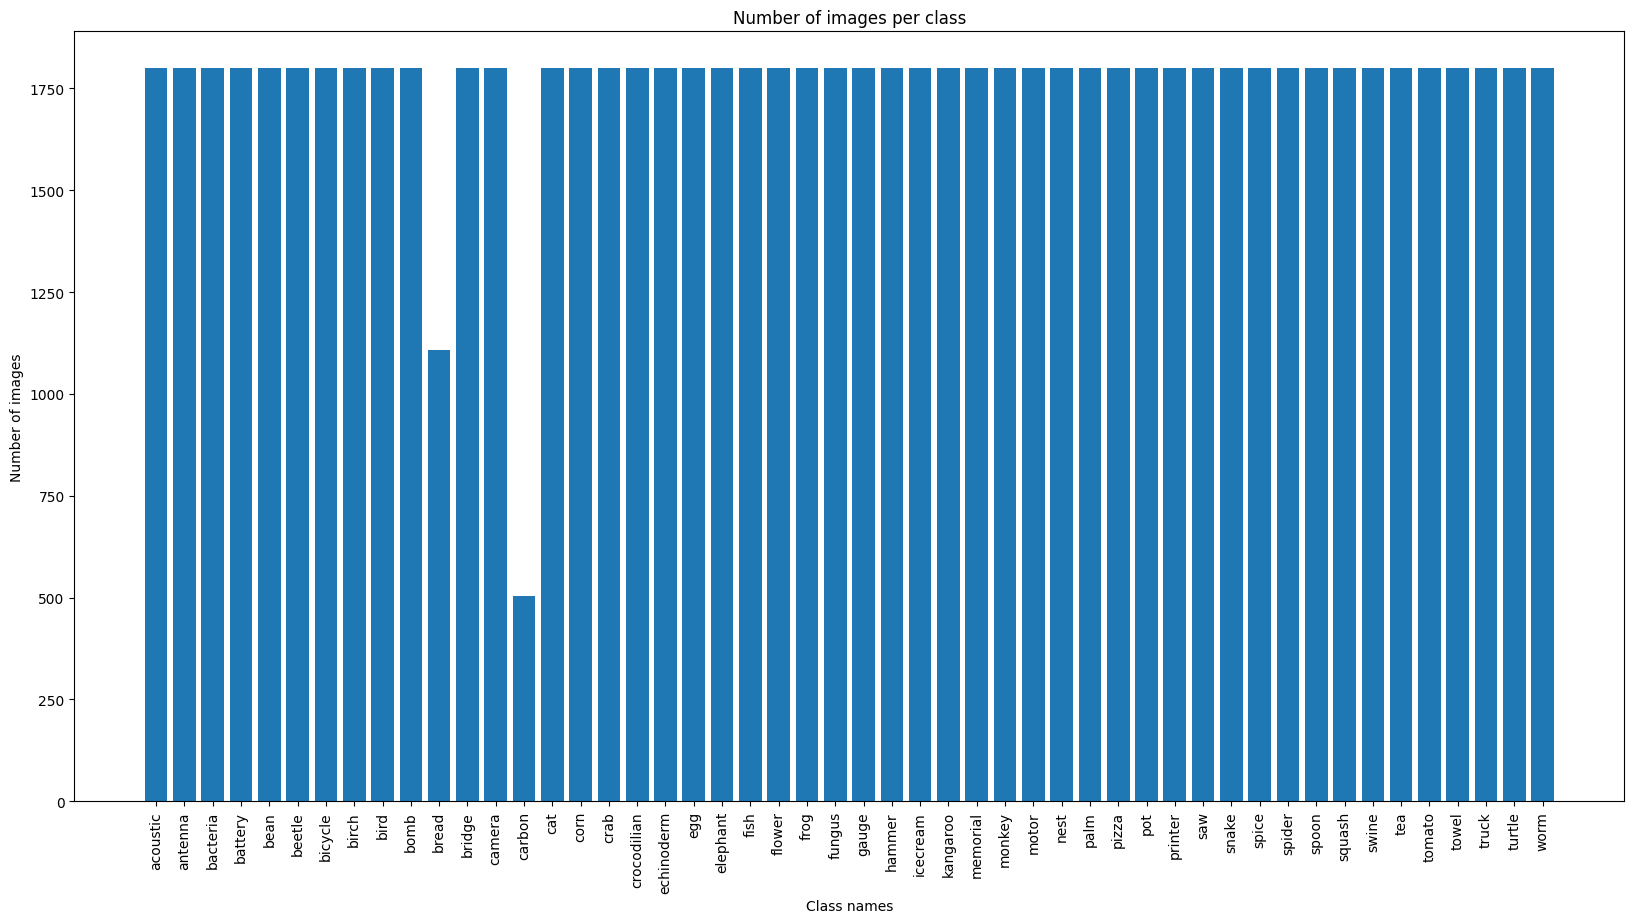

In [17]:
train_folders = os.listdir("train/train")
print(f"Found {len(train_folders)} folders in train/train: {train_folders}")

class_names = []
class_lengths = []
for folder in train_folders:
    class_names.append(folder)
    class_lengths.append(len(os.listdir(f"train/train/{folder}")))

plt.figure(figsize=(20, 10))
plt.title("Number of images per class")
plt.bar(class_names, class_lengths)
plt.xticks(rotation=90)
plt.xlabel("Class names")
plt.ylabel("Number of images")
plt.show()

### Wyświetlenie danych

In [ ]:
# Load data into PyTorch DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 32
train_dataset = torchvision.datasets.ImageFolder(root='train/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

print(f"Number of training samples: {len(train_dataset)}")

Number of training samples: 88011


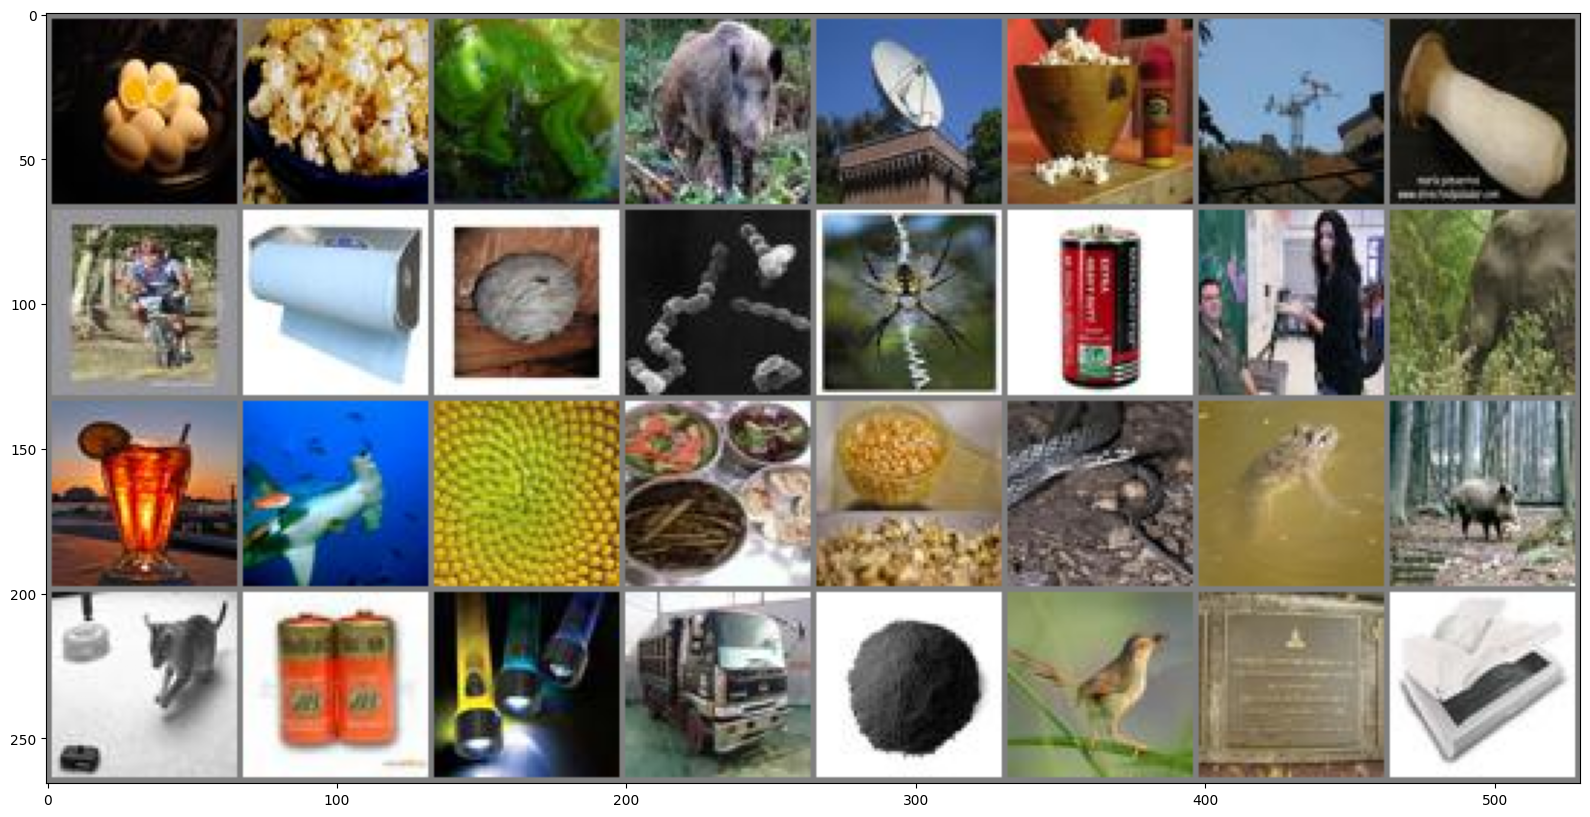

egg   corn  bacteria swine antenna corn  gauge fungus bicycle towel nest  bacteria spider battery crocodilian elephant tea   fish  flower bean  corn  snake frog  swine cat   battery battery truck carbon bird  memorial antenna


In [ ]:
# Visualize the data
plt.figure(figsize = (20,10))

images, labels = next(iter(train_loader))

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images, labels = next(iter(train_loader))

imshow(torchvision.utils.make_grid(images))

print(" ".join(f"{class_names[labels[j]]:5s}" for j in range(batch_size)))
